# Проект по ММПО "Индетификация функции фитнеса методами машинного обучения"

In [2]:
import pandas as pd
import numpy as np
from math import pi
import random
from sklearn import preprocessing

In [3]:
#Эмпирические данные
C, C0, sigma1, sigma2=120,70, 1, 1
args=[C,C0,sigma1,sigma2]
N=50
alpha_j=0.0016
alpha_a=0.006
beta_j=0.0000007
beta_a=0.000000075
delta_j=0.000016
delta_a=0.00006
gamma_j=0.00008
gamma_a=0.004

lamb=[alpha_j,alpha_a,beta_j,beta_a,delta_j,delta_a,gamma_j,gamma_a]

## 1.Создание стратегий

In [4]:
def getData ():
    Aj=np.empty(N,dtype=float)
    Bj=np.empty(N,dtype=float)
    Aa=np.empty(N,dtype=float)
    Ba=np.empty(N,dtype=float)
    
    for i in range(0,N):
        Aj[i]=random.uniform(-C, 0)
        Bj[i]=random.uniform(-min(Aj[i]+C,-1*Aj[i]), min(Aj[i]+C,-1*Aj[i]))
        Aa[i]=random.uniform(-C, 0)
        Ba[i]=random.uniform(-min(Aa[i]+C,-1*Aa[i]), min(Aa[i]+C,-1*Aa[i]))


    cols=['A_j','B_j','A_a','B_a']
    data = pd.DataFrame({
        cols[0]:Aj,cols[1]:Bj,
        cols[2]:Aa,cols[3]:Ba,
    })
    data_strategy = pd.DataFrame(data =  data )
    data_strategy.to_csv("data_parameters.csv", index=False)
    return data_strategy

data_strat=getData()
data_strat

,A_j,B_j,A_a,B_a
0,-87.083031,10.950251,-3.040774,-0.635426
1,-95.136959,21.988832,-54.334874,-6.941310
2,-116.875548,0.424421,-97.819204,8.217986
3,-29.769168,-20.349001,-93.418235,6.109060
4,-99.679874,7.337622,-113.072080,-6.619787
5,-56.285339,-37.737648,-118.606042,0.526746
6,-67.358850,-45.816512,-58.072248,-8.482856
7,-16.051422,-0.874828,-75.376346,31.675317
8,-110.693709,-1.905803,-3.124789,-1.508845
9,-61.556214,28.678390,-113.700456,-5.569447


## 2. Расчет параметров M, MM

In [66]:
from collections import defaultdict

# def param_norm(collect_M, collect_MM):
#    M = defaultdict(list)
#    MM = defaultdict(list)

#    for i in range(1, 9):
#       Z = list(np.array(collect_M['M' + str(i)])/max(np.abs(collect_M['M' + str(i)])))
#       M['M' + str(i) + '_n'].append(Z)
    
#    for i in range(1, 9):
#       for j in range(1, 9):
#          Z = np.array(collect_MM['M' + str(i) + 'M' + str(j)])/max(np.abs(collect_MM['M' + str(i) + 'M' + str(j)])[0])
#          MM['M' + str(i) + 'M' + str(j) + '_n'].append(list(Z[0]))
#    return M, MM

def getParam (N):
   Aj = data_strat['A_j'].tolist()
   Bj = data_strat['B_j'].tolist()
   Aa = data_strat['A_a'].tolist()
   Ba = data_strat['B_a'].tolist()
   collect_M = defaultdict(list)
   collect_MM = defaultdict(list)

   for i in range(1, 9):
      collect_M['M' + str(i)] = []
   for i in range(0, N):
      collect_M['M1'].append(sigma1*(Aj[i] + C))
      collect_M['M2'].append(-sigma2*(Aj[i] + C + Bj[i]/2))
      collect_M['M3'].append((-(2*np.pi)**2)*(Bj[i]**2)/2)
      collect_M['M4'].append(-((Aj[i] + C0)**2 + (Bj[i]**2)/2))
      collect_M['M5'].append(sigma1*(Aa[i] + C))
      collect_M['M6'].append(-sigma2*(Aa[i] + C + Ba[i]/2))
      collect_M['M7'].append((-(2*np.pi)**2)*(Ba[i]**2)/2)
      collect_M['M8'].append(-((Aa[i] + C0)**2 + (Ba[i]**2)/2))

   for i in range(1, 9):
      for j in range(1, 9):
         MM = np.array(collect_M['M' + str(i)])*np.array(collect_M['M' + str(j)])
         collect_MM['M' + str(i) + 'M' + str(j)].append(MM)

   # M, MM = param_norm(collect_M, collect_MM)
   # data_param = {}
   # data = pd.DataFrame(data = data_param)
   # for i in range(1, 9):
   #    data['M' + str(i)] = M['M' + str(i) + '_n'][0]
   # for i in range(1, 9):
   #    for j in range(1, 9):
   #       data['M' + str(i) + 'M' + str(j)] = MM['M' + str(i) + 'M' + str(j) + '_n'][0]
   # data.to_csv("data_param.csv", index=False)

   
   data_param = {}
   data = pd.DataFrame(data = data_param)
   for i in range(1, 9):
      data['M' + str(i)] = collect_M['M' + str(i)]
   for i in range(1, 9):
      for j in range(1, 9):
         data['M' + str(i) + 'M' + str(j)] = collect_MM['M' + str(i) + 'M' + str(j)][0]
   data.to_csv("data_param.csv", index=False)
   return data
data_param = getParam(N)
data_param


,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M1M2,...,M7M7,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,M8M8
0,32.916969,-38.392094,-2366.889004,-351.783961,116.959226,-116.641513,-7.970031,-4483.739836,1083.526822,-1263.751356,...,6.352140e+01,3.573555e+04,-147591.123377,172140.161766,1.061251e+07,1.577308e+06,-524414.741041,522990.198070,3.573555e+04,2.010392e+07
1,24.863041,-35.857458,-9544.080139,-873.621063,65.665126,-62.194471,-951.070395,-269.487077,618.170827,-891.525451,...,9.045349e+05,2.563012e+05,-6700.268345,9663.121423,2.572006e+06,2.354296e+05,-17695.902948,16760.606233,2.563012e+05,7.262328e+04
2,3.124452,-3.336663,-3.555685,-2197.407031,22.180796,-26.289789,-1333.093406,-807.675758,9.762203,-10.425244,...,1.777138e+06,1.076707e+06,-2523.544449,2694.941687,2.871841e+03,1.774792e+06,-17914.891279,21233.625489,1.076707e+06,6.523401e+05
3,90.230832,-80.056332,-8173.648190,-1825.560788,26.581765,-29.636295,-736.679377,-567.074057,8141.603083,-7223.549421,...,5.426965e+05,4.177518e+05,-51167.564127,45397.868757,4.635064e+06,1.035228e+06,-15073.829086,16805.973786,4.177518e+05,3.215730e+05
4,20.320126,-23.988937,-1062.772652,-907.815256,6.927920,-3.618026,-865.003399,-1877.114868,412.907528,-487.458227,...,7.482309e+05,1.623711e+06,-38143.210983,45029.990332,1.994946e+06,1.704074e+06,-13004.501624,6791.451027,1.623711e+06,3.523560e+06
5,63.714661,-44.845837,-28111.200556,-900.156941,1.393958,-1.657331,-5.476873,-2362.686056,4059.557964,-2857.337257,...,2.999613e+01,1.294013e+04,-150537.739944,105956.632893,6.641794e+07,2.126788e+06,-3293.484976,3915.752986,1.294013e+04,5.582285e+06
6,52.641150,-29.732894,-41435.614533,-1056.552050,61.927752,-57.686324,-1420.410552,-178.250693,2771.090665,-1565.173731,...,2.017566e+06,2.531892e+05,-9383.321480,5299.908978,7.385927e+06,1.883311e+05,-11038.664786,10282.627339,2.531892e+05,3.177331e+04
7,103.948578,-103.511164,-15.106901,-2910.831722,44.623654,-60.461313,-19804.855661,-530.567948,10805.306851,-10759.838272,...,3.922323e+08,1.050782e+07,-55151.783686,54919.705757,8.015238e+03,1.544394e+06,-23675.880667,32078.834646,1.050782e+07,2.815023e+05
8,9.306291,-8.353389,-71.694508,-1657.794000,116.875211,-116.120789,-44.938515,-4473.432149,86.607051,-77.739071,...,2.019470e+03,2.010294e+05,-41631.061093,37368.320210,3.207205e+05,7.416029e+06,-522833.326167,519458.469375,2.010294e+05,2.001160e+07
9,58.443786,-72.782981,-16234.513571,-482.522551,6.299544,-3.514820,-612.285425,-1925.239232,3415.676097,-4253.712944,...,3.748934e+05,1.178796e+06,-112518.269252,140124.650228,3.125532e+07,9.289713e+05,-12128.129114,6766.870000,1.178796e+06,3.706546e+06


## 3. Разделение стратегий на классы

In [6]:
def fitness(v):
    r, s, p, q = 0, 0, 0, 0
    
    r = alpha_a*v[4] + beta_a*v[6] + delta_a*v[7]
    s = gamma_a*v[5]
    p = alpha_j*v[0] + beta_j*v[2] + delta_j*v[3]
    q = gamma_j*v[1]

    if ((4*r*p + (p + q - s)**2) < 0):
        return 0
    else:
        return -s - p - q + np.sqrt(4*r*p + (p + q - s)**2)


def get_target(v,w):
    if fitness(v)-fitness(w)>0:
        return 1
    return -1

In [7]:
def getSample():
    data = []
    for i in range(0,N):
        for j in range(i+1,N):
            v=data_param.iloc[i]
            w=data_param.iloc[j]
            differ=v-w
            target=get_target(v,w)
            data.append(differ.append(pd.Series(target, index =['target'])))
            differ=w-v
            target=get_target(w,v)
            data.append(differ.append(pd.Series(target, index =['target'])))
    Sample=pd.DataFrame(data=data)
    Sample.to_csv("Sample.csv", index=False)
    return Sample

Sample=getSample()
Sample


,M1,M2,M3,M4,M5,M6,M7,M8,M1M1,M1M2,...,M7M8,M8M1,M8M2,M8M3,M8M4,M8M5,M8M6,M8M7,M8M8,target
0,8.053927,-2.534637,7177.191135,521.837102,51.294100,-54.447042,943.100364,-4214.252759,465.355995,-372.225905,...,-2.205656e+05,-140890.855032,162477.040343,8.040508e+06,1.341878e+06,-506718.838093,506229.591837,-2.205656e+05,2.003130e+07,1.0
1,-8.053927,2.534637,-7177.191135,-521.837102,-51.294100,54.447042,-943.100364,4214.252759,-465.355995,372.225905,...,2.205656e+05,140890.855032,-162477.040343,-8.040508e+06,-1.341878e+06,506718.838093,-506229.591837,2.205656e+05,-2.003130e+07,-1.0
2,29.792516,-35.055431,-2363.333319,1845.623070,94.778430,-90.351724,1325.123375,-3676.064078,1073.764619,-1253.326112,...,-1.040972e+06,-145067.578928,169445.220080,1.060964e+07,-1.974846e+05,-506499.849762,501756.572581,-1.040972e+06,1.945158e+07,1.0
3,-29.792516,35.055431,2363.333319,-1845.623070,-94.778430,90.351724,-1325.123375,3676.064078,-1073.764619,1253.326112,...,1.040972e+06,145067.578928,-169445.220080,-1.060964e+07,1.974846e+05,506499.849762,-501756.572581,1.040972e+06,-1.945158e+07,-1.0
4,-57.313864,41.664237,5806.759186,1473.776828,90.377461,-87.005218,728.709345,-3916.665779,-7058.076261,5959.798065,...,-3.820162e+05,-96423.559250,126742.293010,5.977451e+06,5.420796e+05,-509340.911956,506184.224284,-3.820162e+05,1.978235e+07,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,-48.484969,18.987466,3668.695133,940.539560,-62.865512,81.487654,12370.227346,-502.253913,-5696.107298,3925.208793,...,-1.118544e+07,30564.164209,5584.116146,4.105808e+06,-6.125379e+05,56028.143384,-76985.968519,-1.118544e+07,1.244464e+06,-1.0
2446,-19.899183,30.227094,-16916.532859,1280.163969,-38.236407,22.884215,-14161.784536,3010.986019,-3698.583094,4451.984909,...,1.318822e+07,329433.628606,-323952.501235,1.026003e+07,-9.848289e+06,378558.545776,-357870.575023,1.318822e+07,-1.501426e+07,-1.0
2447,19.899183,-30.227094,16916.532859,-1280.163969,38.236407,-22.884215,14161.784536,-3010.986019,3698.583094,-4451.984909,...,-1.318822e+07,-329433.628606,323952.501235,-1.026003e+07,9.848289e+06,-378558.545776,357870.575023,-1.318822e+07,1.501426e+07,1.0
2448,-68.384152,49.214560,-13247.837726,2220.703530,-101.101919,104.371869,-1791.557190,2508.732106,-9394.690392,8377.193702,...,2.002775e+06,359997.792815,-318368.385088,1.436583e+07,-1.046083e+07,434586.689160,-434856.543542,2.002775e+06,-1.376979e+07,-1.0


In [8]:
X=Sample.loc[:,'M1':'M8M8']
y=Sample.loc[:,'target']

## 4. Нормировка данных

In [9]:
def normalize(X):
    max_M = defaultdict(list)
    X_norm = pd.DataFrame()
    for i in range(1, 9):
      max_M['M'+ str(i)]= max(np.abs(X['M'+ str(i)]))
      
    for i in range(1, 9):
      for j in range(1, 9):
          max_M['M' + str(i) + 'M' + str(j)]= max(np.abs(X['M' + str(i) + 'M' + str(j)]))

    for i in range(1, 9):
        X_norm['M' + str(i) + '_norm'] = X['M' + str(i)] / max_M['M'+ str(i)]

    for i in range(1, 9):
      for j in range(1, 9):
          X_norm['M' + str(i) + 'M' + str(j) + '_norm'] = X['M' + str(i) + 'M' + str(j)] / max_M['M' + str(i) + 'M' + str(j)]
  
    return X_norm, max_M

X_norm, max_M = normalize(X)
X_norm

,M1_norm,M2_norm,M3_norm,M4_norm,M5_norm,M6_norm,M7_norm,M8_norm,M1M1_norm,M1M2_norm,...,M7M7_norm,M7M8_norm,M8M1_norm,M8M2_norm,M8M3_norm,M8M4_norm,M8M5_norm,M8M6_norm,M8M7_norm,M8M8_norm
0,0.070082,-0.022223,0.173226,0.121159,0.438586,-0.466825,0.023106,-0.978809,0.034484,-0.027743,...,-0.000543,-0.003564,-0.343183,0.417057,0.121063,0.118527,-0.966283,0.967994,-0.003564,0.997965
1,-0.070082,0.022223,-0.173226,-0.121159,-0.438586,0.466825,-0.023106,0.978809,-0.034484,0.027743,...,0.000543,0.003564,0.343183,-0.417057,-0.121063,-0.118527,0.966283,-0.967994,0.003564,-0.997965
2,0.259241,-0.307352,-0.057040,0.428512,0.810396,-0.774670,0.032466,-0.853809,0.079569,-0.093415,...,-0.001067,-0.016822,-0.353356,0.434943,0.159746,-0.017444,-0.965866,0.959441,-0.016822,0.969083
3,-0.259241,0.307352,0.057040,-0.428512,-0.810396,0.774670,-0.032466,0.853809,-0.079569,0.093415,...,0.001067,0.016822,0.353356,-0.434943,-0.159746,0.017444,0.965866,-0.959441,0.016822,-0.969083
4,-0.498719,0.365295,0.140150,0.342178,0.772766,-0.745977,0.017853,-0.909691,-0.523022,0.444205,...,-0.000326,-0.006173,-0.234869,0.325331,0.090000,0.047881,-0.971284,0.967907,-0.006173,0.985562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2445,-0.421894,0.166475,0.088546,0.218372,-0.537527,0.698670,0.303071,-0.116654,-0.422097,0.292560,...,-0.122404,-0.180757,0.074448,0.014334,0.061820,-0.054105,0.106842,-0.147210,-0.180757,0.062000
2446,-0.173153,0.265019,-0.408291,0.297225,-0.326938,0.196208,-0.346964,0.699337,-0.274075,0.331822,...,0.124902,0.213122,0.802436,-0.831543,0.154482,-0.869892,0.721889,-0.684307,0.213122,-0.748014
2447,0.173153,-0.265019,0.408291,-0.297225,0.326938,-0.196208,0.346964,-0.699337,0.274075,-0.331822,...,-0.124902,-0.213122,-0.802436,0.831543,-0.154482,0.869892,-0.721889,0.684307,-0.213122,0.748014
2448,-0.595047,0.431494,-0.319745,0.515597,-0.864464,0.894878,-0.043893,0.582682,-0.696172,0.624382,...,0.002498,0.032365,0.876884,-0.817209,0.216301,-0.923997,0.828732,-0.831517,0.032365,-0.686015


### графики

In [10]:
# import matplotlib.pyplot as plt
# %matplotlib inline

# X1 = X[y==1]
# X0 = X[y==-1]

# for i in range(len(X.columns)):
#     for j in range(i + 1, len(X.columns)):
#         x=np.linspace(-1, 1)
#         plt.figure(figsize=(7, 7))
#         plt.scatter(x = X1[X.columns[i]], y=X1[X.columns[j]], marker='.')
#         plt.scatter(x = X0[X.columns[i]], y=X0[X.columns[j]], marker='x')
#         plt.xlim(-1,1)
#         plt.ylim(-1,1)
#         plt.legend()
#         plt.xlabel(X.columns[i])
#         plt.ylabel(X.columns[j])
#         plt.grid()
#         plt.show()
        

## 5. Разделение выборки на тестовую и обучающую

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=0)  
X_train, y_train


(       M1_norm   M2_norm   M3_norm   M4_norm   M5_norm   M6_norm   M7_norm  \
 194  -0.757959  0.672648  0.197190 -0.086334 -0.037630  0.028693 -0.014612   
 175   0.676679 -0.637488  0.163147 -0.456615 -0.005774 -0.091233 -0.095764   
 1254  0.132063 -0.301263  0.434633 -0.180024 -0.640768  0.758404  0.353474   
 461  -0.165926  0.197629  0.025577 -0.340992  0.403287 -0.275919 -0.626240   
 2344  0.173072 -0.457276  0.390194  0.066379  0.017695 -0.098511  0.063505   
 ...        ...       ...       ...       ...       ...       ...       ...   
 1033  0.051546 -0.007887  0.035286 -0.165283  0.257831 -0.271937  0.105098   
 1731 -0.647126  0.519153  0.116644  0.107159 -0.429162  0.359343 -0.125776   
 763   0.749305 -0.835775 -0.128312 -0.125721 -0.384053  0.573581 -0.998899   
 835   0.269928 -0.062111  0.216295 -0.292347  0.676396 -0.700292  0.014912   
 1653  0.456427 -0.282521  0.442022 -0.384988  0.762651 -0.813381 -0.044932   
 
        M8_norm  M1M1_norm  M1M2_norm  ...  M7M7_n

# Процесс обучения

## Реализация метода опорных векторов

In [17]:
from sklearn.svm import SVC 
#экземпляр классификатора
svc_model = SVC(kernel = 'linear', C = 1)
#обучения классификатора
svc_model.fit(X_train, y_train)
SVC_prediction = svc_model.predict(X_test) 
SVC_prediction


array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1

In [18]:
svc_model.coef_ # Коэффициенты разделяющей гиперплоскости

array([[ 0.42725361, -1.18795504,  0.21080353,  1.42228849,  2.00317118,
        -3.32354842,  0.06706312,  1.58460951, -0.07369788,  0.43444757,
         0.39679781, -1.06225069,  0.81153174, -1.48867547, -0.29809266,
         0.34205114,  0.43444757, -0.80768582,  0.03040588,  1.03324077,
        -0.33249328,  1.03435999,  0.29754836, -0.34653303,  0.39679781,
         0.03040588,  0.04451366,  0.86789035,  0.2686278 , -0.2291678 ,
         0.12129043, -0.18596239, -1.06225069,  1.03324077,  0.86789035,
        -1.697971  ,  0.97059811,  0.10657651, -0.884202  ,  0.05940037,
         0.81153174, -0.33249328,  0.2686278 ,  0.97059811,  1.21894808,
        -2.23566985,  0.31006639, -0.49855571, -1.48867547,  1.03435999,
        -0.2291678 ,  0.10657651, -2.23566985,  3.25537323,  0.12655456,
         0.74041769, -0.29809266,  0.29754836,  0.12129043, -0.884202  ,
         0.31006639,  0.12655456, -0.12549915,  0.32479548,  0.34205114,
        -0.34653303, -0.18596239,  0.05940037, -0.4

> Уравнение разделяющей гиперплоскости: **W.X + b = 0**
атрибут coef_ содержит векторы разделяющих гиперплоскостей для линейных моделей
**w = coef_[0]** - вектор, ортогональный гиперплоскости (гиперплоскость полностью определяется им + точка пересечения).
<br>Чтобы построить эту гиперплоскость в двухмерном случае (любая гиперплоскость двухмерной плоскости является одномерной линией), мы хотим найти f:
<br>**f(x) = a.x + b.** В этом случае a - это наклон линии, который может быть вычислен с помощью **a = -w[0] / w[1]**

<img src="form.png">


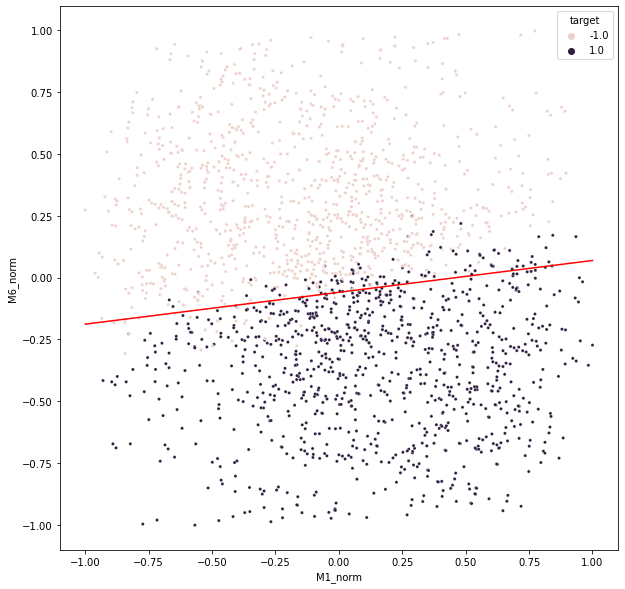

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))

sns.scatterplot(x=X_train.iloc[:,0], 
                y=X_train.iloc[:,5], 
                hue=y_train, 
                s=10)

w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[5]) * x_points - b / w[5]  
plt.plot(x_points, y_points, c='r')

## Реализация метода дискриминанта Фишера

In [122]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# from sklearn.metrics import accuracy_score

# lda_model = LDA(n_components=1)
# X_train_LDA = lda_model.fit_transform(X_train_LDA, y_train_LDA)
# X_test_LDA = lda_model.transform(X_test_LDA)
# LDA_prediction= lda_model.predict(X_test_LDA)
# LDA_prediction

from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
LDA_prediction = lda_model.predict(X_test) 
LDA_prediction

array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,
        1., -1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,
       -1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,
        1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,  1

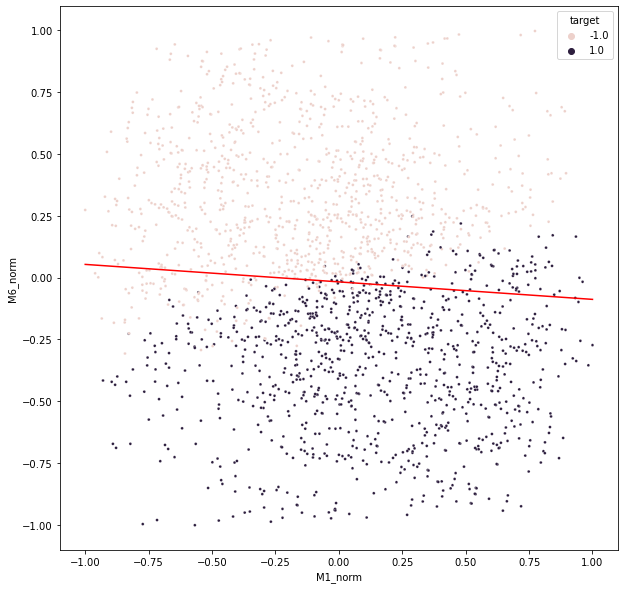

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

sns.scatterplot(x=X_train.iloc[:,0], 
                y=X_train.iloc[:,5], 
                hue=y_train, 
                s=8)
w = lda_model.coef_[0]
b = lda_model.intercept_[0]
x_points = np.linspace(-1, 1)   
y_points = -(w[0] / w[5]) * x_points - b / w[5]  
plt.plot(x_points, y_points, c='r')

In [124]:
lda_model.coef_

array([[-0.70307353, -9.82833164,  0.43293946, -0.22816652, -0.71782936,
        -9.95614002, -3.29232818,  4.713389  , -0.47339244,  2.48993089,
        -3.90115421, -3.8625194 ,  2.26361527, -0.76790638,  5.66673058,
         5.17168885,  2.48993089, -4.31233129, -2.06274729,  0.83704971,
         2.08433418,  0.13841241,  6.07341539,  3.18331229, -3.90115421,
        -2.06274729, -0.42336334, -1.82501868,  1.4960423 ,  1.21004749,
         0.45310997,  0.90643156, -3.8625194 ,  0.83704971, -1.82501868,
        -6.33423303, -1.03590281, -1.51139909, -0.79167496,  1.69933215,
         2.26361527,  2.08433418,  1.4960423 , -1.03590281, -2.89565196,
         0.21935934, -2.53723059, -5.2772302 , -0.76790638,  0.13841241,
         1.21004749, -1.51139909,  0.21935934,  2.66698811, -2.03953154,
        -3.45372579,  5.66673058,  6.07341539,  0.45310997, -0.79167496,
        -2.53723059, -2.03953154, -5.77188124,  1.24676773,  5.17168885,
         3.18331229,  0.90643156,  1.69933215, -5.2

## Сравнение методов SVM и LDA

In [28]:
# Оценка точности — простейший вариант оценки работы классификатора
from sklearn.metrics import accuracy_score
from sklearn import model_selection

print('Точность классификатора:')
print('     SVM: ', accuracy_score(SVC_prediction, y_test))
print('     LDA: ', accuracy_score(LDA_prediction, y_test))

SVM = model_selection.cross_val_score(svc_model, X_norm, y)
LDA = model_selection.cross_val_score(lda_model, X_norm, y)
print('Логарифмическая потеря:')
print('     SVM: ', SVM.mean())
print('     LDA: ', LDA.mean())

Точность классификатора:
     SVM:  0.9755102040816327
     LDA:  0.9775510204081632
Логарифмическая потеря:
     SVM:  0.9677551020408164
     LDA:  0.9485714285714286


In [29]:
#Переход от нормированных коэффициентов (lambd), которые получили после обучения
lamb_norm_svc = defaultdict(list)
for i in range(1,9):
   lamb_norm_svc['M'+str(i)]=svc_model.coef_[0][i-1] / np.abs(max_M['M'+str(i)])
k=8
for i in range(1,9):
   for j in range(1,9):
      lamb_norm_svc['M'+str(i)+'M'+str(j)]=svc_model.coef_[0][k] / np.abs(max_M['M'+str(i)+'M'+str(j)])
      k+=1

lamb_norm_lda = defaultdict(list)
for i in range(1,9):
   lamb_norm_lda['M'+str(i)]=lda_model.coef_[0][i-1] / np.abs(max_M['M'+str(i)])
k=8
for i in range(1,9):
   for j in range(1,9):
      lamb_norm_lda['M'+str(i)+'M'+str(j)]=lda_model.coef_[0][k] / np.abs(max_M['M'+str(i)+'M'+str(j)])
      k+=1

In [30]:
#Преобразование collect lambd -> list
lam=[]
for i in range(1,9):
    lam.append(lamb_norm_svc['M'+str(i)])
for i in range(1,9):
    for j in range(1,9):
        lam.append(lamb_norm_svc['M'+str(i)+'M'+str(j)])

# Проверка по Тейлору

In [67]:
def getSPQR (data_param):
   M = data_param.loc[:,'M1':'M8'] 
   
   J = []
   R, S, P, Q = [], [], [], []

   for i in range(0, N):
      r = alpha_a*M['M5'][i] + beta_a*M['M7'][i] + delta_a*M['M8'][i]
      s = gamma_a*M['M6'][i]
      p = alpha_j*M['M1'][i] + beta_j*M['M3'][i] + delta_j*M['M4'][i]
      q = gamma_j*M['M2'][i]

      # if ((4*r*p + (p + q - s)**2) < 0):
      #    continue
      # else:
      #    J.append(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))
      
      J.append(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

      R.append(r)
      S.append(s)
      P.append(p)
      Q.append(q)
   
   data_Jrspq = {'J': J, 'R': R, 'S': S, 'P': P, 'Q': Q}
   data = pd.DataFrame(data = data_Jrspq)
   data.to_csv('data_Jrspq.csv', index=False)
   return data

data_Jrspq = getSPQR(data_param)
data_Jrspq

<ipython-input-67-6542f4808469>:18: RuntimeWarning: invalid value encountered in sqrt
  J.append(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))


,J,R,S,P,Q
0,1.005210,0.432730,-0.466566,0.045382,-0.003071
1,0.547382,0.377750,-0.248778,0.019122,-0.002869
2,NaN,0.084524,-0.105159,-0.030162,-0.000267
3,0.337996,0.125411,-0.118545,0.109439,-0.006405
4,NaN,-0.071124,-0.014472,0.017243,-0.001919
5,NaN,-0.133398,-0.006629,0.067863,-0.003588
6,0.550353,0.360765,-0.230745,0.038316,-0.002379
7,0.617314,0.234422,-0.241845,0.119734,-0.008281
8,0.906011,0.432842,-0.464483,-0.011685,-0.000668
9,NaN,-0.077763,-0.014059,0.074426,-0.005823


In [32]:
#Выбор оптимальных параметров
opt_R=float(data_Jrspq.nlargest(1, columns=['J'])['R'])
opt_S=float(data_Jrspq.nlargest(1, columns=['J'])['S'])
opt_P=float(data_Jrspq.nlargest(1, columns=['J'])['P'])
opt_Q=float(data_Jrspq.nlargest(1, columns=['J'])['Q'])

opt_R1=opt_R
opt_R/=opt_R1
opt_S/=opt_R1
opt_P/=opt_R1
opt_Q/=opt_R1
# opt_R=data_Jrspq.mean().tolist()[1]
# opt_S=data_Jrspq.mean().tolist()[2]
# opt_P1=data_Jrspq.mean().tolist()[3]
# opt_Q=data_Jrspq.mean().tolist()[4]
opt_R,opt_S,opt_P,opt_Q




(1.0, -1.0280952256806706, 0.270373228879635, -0.017455007056778247)

In [33]:
# Частные производные первого порядка
def dJdp(r,s,p,q):
   return -1 + (2*r + (p + q - s))/(np.sqrt(4*r*p + (p + q - s)**2))

def dJdq(r,s,p,q):
   return -1 + (p + q - s)/(np.sqrt(4*r*p + (p + q - s)**2))

def dJdr(r,s,p,q):
   return 2.0*p/(4*p*r + (p + q - s)**2)**0.5

def dJds(r,s,p,q):
   return (-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**0.5 - 1

 # Частные производные второго порядка
def dJdpdp(r,s,p,q):
   return (-1.0*p - 1.0*q - 2.0*r + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdqdq(r,s,p,q):
   return(-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdrdr(r,s,p,q):
   return -4.0*p**2/(4*p*r + (p + q - s)**2)**1.5

def dJdsds(r,s,p,q):
   return (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdpdq(r,s,p,q):
   return (-1.0*p - 1.0*q + 1.0*s)*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdpdr(r,s,p,q):
   return -2.0*p*(1.0*p + 1.0*q + 2.0*r - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5 + 2.0/(4*p*r + (p + q - s)**2)**0.5

def dJdpds(r,s,p,q):
   return (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdqdr(r,s,p,q):
   return -2.0*p*(1.0*p + 1.0*q - 1.0*s)/(4*p*r + (p + q - s)**2)**1.5

def dJdqds(r,s,p,q):
   return (-1.0*p - 1.0*q + 1.0*s)**2/(4*p*r + (p + q - s)**2)**1.5 - 1.0/(4*p*r + (p + q - s)**2)**0.5

def dJdrds(r,s,p,q):
   return -2.0*p*(-1.0*p - 1.0*q + 1.0*s)/(4*p*r + (p + q - s)**2)**1.5


h1 = dJdp(opt_R, opt_S, opt_P, opt_Q) * alpha_j
lamb1 = lamb_norm_svc['M1']
lamb1_ = lamb_norm_lda['M1']

h2 = dJdq(opt_R, opt_S, opt_P, opt_Q) * gamma_j 
lamb2 = lamb_norm_svc['M2']
lamb2_ = lamb_norm_lda['M2']

h3 = dJdp(opt_R, opt_S, opt_P, opt_Q) * beta_j
lamb3 = lamb_norm_svc['M3']
lamb3_ = lamb_norm_lda['M3']

h4 = dJdp(opt_R, opt_S, opt_P, opt_Q) * delta_j
lamb4 = lamb_norm_svc['M4']
lamb4_ = lamb_norm_lda['M4']

h5 = dJdr(opt_R, opt_S, opt_P, opt_Q) * alpha_a
lamb5 = lamb_norm_svc['M5']
lamb5_ = lamb_norm_lda['M5']

h6 = dJds(opt_R, opt_S, opt_P, opt_Q) * gamma_a 
lamb6 = lamb_norm_svc['M6']
lamb6_ = lamb_norm_lda['M6']

h7 = dJdr(opt_R, opt_S, opt_P, opt_Q) * beta_a
lamb7 = lamb_norm_svc['M7']
lamb7_ = lamb_norm_lda['M7']

h8 = dJdr(opt_R, opt_S, opt_P, opt_Q) * delta_a
lamb8 = lamb_norm_svc['M8']
lamb8_ = lamb_norm_lda['M8']

h11 = dJdpdp(opt_R, opt_S, opt_P, opt_Q) * alpha_j**2 * (1/2)
lamb9 = lamb_norm_svc['M1M1']
lamb9_ = lamb_norm_lda['M1M1']

h12 = dJdpdq(opt_R, opt_S, opt_P, opt_Q) * alpha_j*gamma_j* (1/2)
lamb10 = lamb_norm_svc['M1M2']
lamb10_ = lamb_norm_lda['M1M2']

h22 = dJdqdq(opt_R, opt_S, opt_P, opt_Q) * gamma_j**2 * (1/2)
lamb22 = lamb_norm_svc['M2M2']
lamb22_ = lamb_norm_lda['M2M2']

h33 = dJdqdq(opt_R, opt_S, opt_P, opt_Q) * beta_j**2 * (1/2)
lamb33 = lamb_norm_svc['M3M3']
lamb33_ = lamb_norm_lda['M3M3']

h44 = dJdqdq(opt_R, opt_S, opt_P, opt_Q) * delta_j**2 * (1/2)
lamb44 = lamb_norm_svc['M4M4']
lamb44_ = lamb_norm_lda['M4M4']

h55 = dJdrdr(opt_R, opt_S, opt_P, opt_Q) * alpha_a**2 * (1/2)
lamb55 = lamb_norm_svc['M5M5']
lamb55_ = lamb_norm_lda['M5M5']

h66 = dJdrdr(opt_R, opt_S, opt_P, opt_Q) * beta_a**2 * (1/2)
lamb66 = lamb_norm_svc['M6M6']
lamb66_ = lamb_norm_lda['M6M6']

# df=pd.DataFrame([['h1', h1/h1, lamb1/lamb1, lamb1_/lamb1_],
#                  ['h2', h2/h1, lamb2/lamb1, lamb2_/lamb1_],
#                  ['h3', h3/h1, lamb3/lamb1, lamb3_/lamb1_],
#                  ['h4', h4/h1, lamb4/lamb1, lamb4_/lamb1_],
#                  ['h5', h5/h1, lamb5/lamb1, lamb5_/lamb1_],
#                  ['h6', h6/h1, lamb6/lamb1, lamb6_/lamb1_],
#                  ['h7', h7/h1, lamb7/lamb1, lamb7_/lamb1_],
#                  ['h8', h8/h1, lamb8/lamb1, lamb8_/lamb1_],
#                  ['h11', h11/h1, lamb9/lamb1, lamb9_/lamb1_],
#                  ['h12', h12/h1, lamb10/lamb1, lamb10_/lamb1_],
#                  ['h22', h22/h1, lamb22/lamb1, lamb22_/lamb1_],
#                  ['h33', h33/h1, lamb33/lamb1, lamb33_/lamb1_],
#                  ['h44', h44/h1, lamb44/lamb1, lamb44_/lamb1_],
#                  ['h55', h55/h1, lamb55/lamb1, lamb55_/lamb1_],
#                  ['h66', h66/h1, lamb66/lamb1, lamb66_/lamb1_]], 
#     columns=['id','Тейлор', 'ML(SVC)', 'ML(LDA)'])
df=pd.DataFrame([['h1', h1, lamb1, lamb1_],
                 ['h2', h2, lamb2, lamb2_],
                 ['h3', h3, lamb3, lamb3_],
                 ['h4', h4, lamb4, lamb4_],
                 ['h5', h5, lamb5, lamb5_],
                 ['h6', h6, lamb6, lamb6_],
                 ['h7', h7, lamb7, lamb7_],
                 ['h8', h8, lamb8, lamb8_],
                 ['h11', h11, lamb9, lamb9_],
                 ['h12', h12, lamb10, lamb10_],
                 ['h22', h22, lamb22, lamb22_],
                 ['h33', h33, lamb33, lamb33_],
                 ['h44', h44, lamb44, lamb44_],
                 ['h55', h55, lamb55, lamb55_],
                 ['h66', h66, lamb66, lamb66_]], 
    columns=['id','Тейлор', 'ML(SVC)', 'ML(LDA)'])

df


,id,Тейлор,ML(SVC),ML(LDA)
0,h1,1.581596e-03,3.717762e-03,-6.117819e-03
1,h2,-1.789012e-05,-1.041552e-02,-8.617090e-02
2,h3,6.919481e-07,5.087870e-06,1.044926e-05
3,h4,1.581596e-05,3.302232e-04,-5.297510e-05
4,h5,1.966355e-03,1.712797e-02,-6.137747e-03
5,h6,-7.105494e-03,-2.849589e-02,-8.536329e-02
6,h7,2.457944e-08,1.643048e-06,-8.066210e-05
7,h8,1.966355e-05,3.680440e-04,1.094739e-03
8,h11,-2.291687e-06,-5.461209e-06,-3.507964e-05
9,h12,-2.109353e-08,3.238094e-05,1.855835e-04


# Решение задачи оптимизации

In [61]:
#Средние значения Aj,Bj,Aa,Ba из ранее сгенерированных 
aj=data_strat.mean().tolist()[0]
bj=data_strat.mean().tolist()[1]
aa=data_strat.mean().tolist()[2]
ba=data_strat.mean().tolist()[3]
aj,bj,aa,ba

(-60.09168785553474,
 -1.3709337000428354,
 -62.37981943625212,
 -7.208327228425173)

## Дифференциальная эволюция

## 1. DE c s,p,q,r

In [98]:
from scipy.optimize import differential_evolution
from scipy.optimize import NonlinearConstraint
from scipy.optimize import LinearConstraint

def fitn(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    r = alpha_a*M5 + beta_a*M7 + delta_a*M8
    s = gamma_a*M6
    p = alpha_j*M1 + beta_j*M3 + delta_j*M4
    q = gamma_j*M2
    return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

def constr_f1(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    r = alpha_a*M5 + beta_a*M7 + delta_a*M8
    s = gamma_a*M6
    p = alpha_j*M1 + beta_j*M3 + delta_j*M4
    q = gamma_j*M2
    return -(4*r*p + (p + q - s)**2)

def constr_f2(x):
    Aj = x[0]
    # Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    return -min(Aj+C,-1*Aj) + np.abs(Bj)

def constr_f3(x):
    Aa = x[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    return -min(Aa+C,-1*Aa) + np.abs(Ba)


nlc1 = NonlinearConstraint(constr_f1, -np.inf, 0)
nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)

nlc=(nlc1,nlc2,nlc3)
bounds=((-C, 0), (-C, 0))
result_DE = differential_evolution(fitn, bounds, constraints=(nlc), strategy = 'rand2bin', popsize=100, maxiter=1000, recombination=0.3, seed=1,
 disp=True, polish= True)


result_DE

differential_evolution step 1: f(x)= -1.08115
differential_evolution step 2: f(x)= -1.08131
differential_evolution step 3: f(x)= -1.08131
differential_evolution step 4: f(x)= -1.08131
differential_evolution step 5: f(x)= -1.08131
differential_evolution step 6: f(x)= -1.08131
differential_evolution step 7: f(x)= -1.08131
differential_evolution step 8: f(x)= -1.08131
differential_evolution step 9: f(x)= -1.08141
differential_evolution step 10: f(x)= -1.08141
differential_evolution step 11: f(x)= -1.08141
differential_evolution step 12: f(x)= -1.08141
differential_evolution step 13: f(x)= -1.08141
differential_evolution step 14: f(x)= -1.08141
differential_evolution step 15: f(x)= -1.08141
differential_evolution step 16: f(x)= -1.08216
differential_evolution step 17: f(x)= -1.08216
differential_evolution step 18: f(x)= -1.08275
differential_evolution step 19: f(x)= -1.08275
differential_evolution step 20: f(x)= -1.08276
differential_evolution step 21: f(x)= -1.08276
differential_evolution

C:\Users\August\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


           constr: [array([0.]), array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -1.0828400812025045
              jac: [array([[ 0.00016988, -0.00589051]]), array([[ 1.36667903, -0.        ]]), array([[-0.        ,  1.95297272]]), array([[1., 0.],
       [0., 1.]])]
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 3813
              nit: 25
          success: True
                x: array([-19.44145101,  -9.75933043])

In [99]:
Aj=result_DE.x[0]
Aa=result_DE.x[1]
Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
Aj, Bj, Aa, Ba

(-19.441451008356047,
 0.20480820257650426,
 -9.759330433698066,
 9.759078352985908)

## Построение оптимальных стратегий

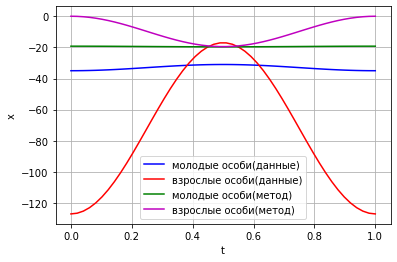

In [100]:
A_j=-33
B_j=-2
A_a=-72
B_a=-55

t=np.linspace(0,1)
x_j_true=A_j+B_j*np.cos(2*pi*t)
x_a_true=A_a+B_a*np.cos(2*pi*t)
x_j=Aj+Bj*np.cos(2*pi*t)
x_a=Aa+Ba*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_true,label='молодые особи(данные)',color='b')
plt.plot(t,x_a_true,label='взрослые особи(данные)',color='r')
plt.plot(t,x_j,label='молодые особи(метод)', color='g')
plt.plot(t,x_a,label='взрослые особи(метод)',color='m')
plt.legend()
plt.show()

## 2. DE c lamb

In [102]:
def fitn(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    M=[M1,M2,M3,M4,M5,M6,M7,M8]
  
    for i in range(0,8):
        for j in range(0,8):
            M.append(M[i]*M[j])
            
    return -np.dot(lam,M)


def constr_f2(x):
    Aj = x[0]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    return -min(Aj+C,-1*Aj) + np.abs(Bj)

def constr_f3(x):
    Aa = x[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    return -min(Aa+C,-1*Aa) + np.abs(Ba)

nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)
nlc=(nlc2,nlc3)

bounds=((-C, 0), (-C, 0))

result_DE1 = differential_evolution(fitn, bounds, constraints=(nlc), strategy = 'rand2bin', popsize=30, maxiter=1000, recombination=0.7, seed=1,
 disp=True, polish= False)

result_DE1


differential_evolution step 1: f(x)= -20.1866
differential_evolution step 2: f(x)= -20.1866
differential_evolution step 3: f(x)= -20.1866
differential_evolution step 4: f(x)= -20.1866
differential_evolution step 5: f(x)= -20.1866
differential_evolution step 6: f(x)= -20.1866
differential_evolution step 7: f(x)= -20.1866
differential_evolution step 8: f(x)= -20.1866
differential_evolution step 9: f(x)= -20.1875
differential_evolution step 10: f(x)= -20.1875
differential_evolution step 11: f(x)= -20.1875
differential_evolution step 12: f(x)= -20.1875
differential_evolution step 13: f(x)= -20.1875
differential_evolution step 14: f(x)= -20.1875
differential_evolution step 15: f(x)= -20.1875
differential_evolution step 16: f(x)= -20.1875
differential_evolution step 17: f(x)= -20.1875
differential_evolution step 18: f(x)= -20.1875
differential_evolution step 19: f(x)= -20.2045
differential_evolution step 20: f(x)= -20.2045
differential_evolution step 21: f(x)= -20.2473
differential_evolution

           constr: [array([0.]), array([0.])]
 constr_violation: 0.0
              fun: -20.259802922343894
            maxcv: 0.0
          message: 'Optimization terminated successfully.'
             nfev: 1118
              nit: 27
          success: True
                x: array([-6.15185904, -9.78509861])

In [103]:
Aj=result_DE1.x[0]
Aa=result_DE1.x[1]
Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
Aj, Bj, Aa, Ba

(-6.1518590429708055, 5.077822896228899, -9.785098611865266, 9.7345219831002)

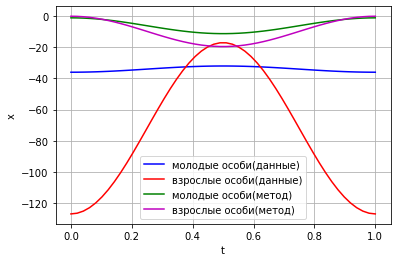

In [104]:
A_j=-34
B_j=-2
A_a=-72
B_a=-55

t=np.linspace(0,1)
x_j_true=A_j+B_j*np.cos(2*pi*t)
x_a_true=A_a+B_a*np.cos(2*pi*t)
x_j=Aj+Bj*np.cos(2*pi*t)
x_a=Aa+Ba*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_true,label='молодые особи(данные)',color='b')
plt.plot(t,x_a_true,label='взрослые особи(данные)',color='r')
plt.plot(t,x_j,label='молодые особи(метод)', color='g')
plt.plot(t,x_a,label='взрослые особи(метод)',color='m')
plt.legend()
plt.show()

# minimize

## 1. minimize c lamb

In [110]:
from scipy import optimize
 
def fitn(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    M=[M1,M2,M3,M4,M5,M6,M7,M8]
    J=0
    for i in range(0,8):
        J+=lam[i]*M[i]
    k=8
    for i in range(0,8):
        for j in range(0,8):
            J+=lam[k]*(M[i]*M[j])
            k+=1
    return -J

def constr_f2(x):
    Aj = x[0]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    return -min(Aj+C,-1*Aj) + np.abs(Bj)

def constr_f3(x):
    Aa = x[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    return -min(Aa+C,-1*Aa) + np.abs(Ba)

# def constr_f1(x):
#     Aj,Aa=x[0], x[1]
#     Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
#     Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
#     M1=sigma1*(Aj + C)
#     M2=(-sigma2*(Aj + C + Bj/2))
#     M3=((-(2*np.pi)**2)*(Bj**2)/2)
#     M4=(-((Aj + C0)**2 + (Bj**2)/2))
#     M5=(sigma1*(Aa + C))
#     M6=(-sigma2*(Aa + C + Ba/2))
#     M7=((-(2*np.pi)**2)*(Ba**2)/2)
#     M8=(-((Aa + C0)**2 + (Ba**2)/2))
#     r = alpha_a*M5 + beta_a*M7 + delta_a*M8
#     s = gamma_a*M6
#     p = alpha_j*M1 + beta_j*M3 + delta_j*M4
#     q = gamma_j*M2
#     return -(4*r*p + (p + q - s)**2)


# nlc2 = NonlinearConstraint(constr_f2, -np.inf, 0)
# nlc3 = NonlinearConstraint(constr_f3, -np.inf, 0)
# cons=(nlc2,nlc3)

# cons = ({'type':'ineq','fun':constr_f1})
cons = ({'type':'ineq','fun':constr_f2},
         {'type':'ineq','fun':constr_f3})

result = optimize.minimize(fitn, x0=(-25,-8),  method='SLSQP', bounds=((-C,0),(-C,0)), 
                            constraints=cons, options={'maxiter':10000, 'disp': True}) 
result

Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.72212412538593
            Iterations: 10
            Function evaluations: 30
            Gradient evaluations: 10


     fun: -23.72212412538593
     jac: array([-3.81469727e-06, -3.79308939e-01])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([-5.03893754,  0.        ])

In [111]:
Aj=result.x[0]
Aa=result.x[1]
Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
Aj, Bj, Aa, Ba

(-5.038937537607207, 5.485907874506966, 0.0, 19.05945366130988)

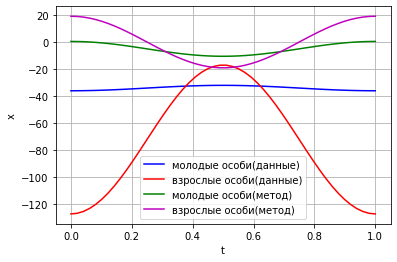

In [112]:
A_j=-34
B_j=-2
A_a=-72
B_a=-55

t=np.linspace(0,1)
x_j_true=A_j+B_j*np.cos(2*pi*t)
x_a_true=A_a+B_a*np.cos(2*pi*t)
x_j=Aj+Bj*np.cos(2*pi*t)
x_a=Aa+Ba*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_true,label='молодые особи(данные)',color='b')
plt.plot(t,x_a_true,label='взрослые особи(данные)',color='r')
plt.plot(t,x_j,label='молодые особи(метод)', color='g')
plt.plot(t,x_a,label='взрослые особи(метод)',color='m')
plt.legend()
plt.show()

## 2. minimize c s,p,q,r

In [113]:
def fitn(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    r = alpha_a*M5 + beta_a*M7 + delta_a*M8
    s = gamma_a*M6
    p = alpha_j*M1 + beta_j*M3 + delta_j*M4
    q = gamma_j*M2
    return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))

def constr_f1(x):
    Aj,Aa=x[0], x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    r = alpha_a*M5 + beta_a*M7 + delta_a*M8
    s = gamma_a*M6
    p = alpha_j*M1 + beta_j*M3 + delta_j*M4
    q = gamma_j*M2
    return -(4*r*p + (p + q - s)**2)

def constr_f2(x):
    Aj = x[0]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    return -min(Aj+C,-1*Aj) + np.abs(Bj)

def constr_f3(x):
    Aa = x[1]
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    return -min(Aa+C,-1*Aa) + np.abs(Ba)

# cons = ({'type':'ineq','fun':constr_f1})
cons = ({'type':'ineq','fun':constr_f1},
         {'type':'ineq','fun':constr_f2},
         {'type':'ineq','fun':constr_f3})

result_1 = optimize.minimize(fitn, x0=(-25,-8),  method='SLSQP', bounds=((-C,0),(-C,0)), 
                           constraints=cons, options={'maxiter':10000, 'disp': True}) 
result_1

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13470394630033217
            Iterations: 114
            Function evaluations: 466
            Gradient evaluations: 114


<ipython-input-113-c61738be6dd6>:17: RuntimeWarning: invalid value encountered in sqrt
  return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))


     fun: 0.13470394630033217
     jac: array([ -0.3739941 , -44.28553515])
 message: 'Optimization terminated successfully'
    nfev: 466
     nit: 114
    njev: 114
  status: 0
 success: True
       x: array([-38.39405555, -92.37532476])

In [116]:
Aj=result_1.x[0]
Aa=result_1.x[1]
Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
Aj, Bj, Aa, Ba

(-38.39405555040889,
 -6.744714450712081,
 -92.37532476459391,
 -68.97170742865157)

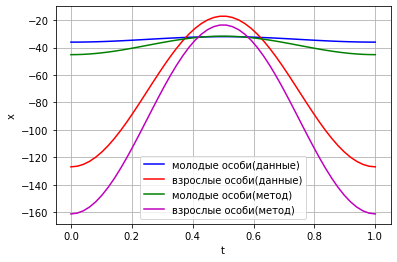

In [117]:
A_j=-34
B_j=-2
A_a=-72
B_a=-55

t=np.linspace(0,1)
x_j_true=A_j+B_j*np.cos(2*pi*t)
x_a_true=A_a+B_a*np.cos(2*pi*t)
x_j=Aj+Bj*np.cos(2*pi*t)
x_a=Aa+Ba*np.cos(2*pi*t)
plt.xlabel("t") 
plt.ylabel("x")
plt.grid()  
plt.plot(t,x_j_true,label='молодые особи(данные)',color='b')
plt.plot(t,x_a_true,label='взрослые особи(данные)',color='r')
plt.plot(t,x_j,label='молодые особи(метод)', color='g')
plt.plot(t,x_a,label='взрослые особи(метод)',color='m')
plt.legend()
plt.show()

# График восстановленного фитнеса

In [42]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def isNaN(num):
   
#     if np.any(num)<0:
#         return True
#     else:
#         return False

# def fitness(x):
#     Aj,Aa=x[0], x[1]
#     Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
#     Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
#     M1=sigma1*(Aj + C)
#     M2=(-sigma2*(Aj + C + Bj/2))
#     M3=((-(2*np.pi)**2)*(Bj**2)/2)
#     M4=(-((Aj + C0)**2 + (Bj**2)/2))
#     M5=(sigma1*(Aa + C))
#     M6=(-sigma2*(Aa + C + Ba/2))
#     M7=((-(2*np.pi)**2)*(Ba**2)/2)
#     M8=(-((Aa + C0)**2 + (Ba**2)/2))
#     r = alpha_a*M5 + beta_a*M7 + delta_a*M8
#     s = gamma_a*M6
#     p = alpha_j*M1 + beta_j*M3 + delta_j*M4
#     q = gamma_j*M2
#     # J= -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))
#     sqr=(4*r*p + (p + q - s)**2)
#     x=isNaN(sqr)
#     if (x==False):
#         return -(-s - p - q + np.sqrt(4*r*p + (p + q - s)**2))
#     else: return 0

# def fitnes(x):
#     Aj,Aa = x[0],x[1]
#     Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
#     Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
#     M1=sigma1*(Aj + C)
#     M2=(-sigma2*(Aj + C + Bj/2))
#     M3=((-(2*np.pi)**2)*(Bj**2)/2)
#     M4=(-((Aj + C0)**2 + (Bj**2)/2))
#     M5=(sigma1*(Aa + C))
#     M6=(-sigma2*(Aa + C + Ba/2))
#     M7=((-(2*np.pi)**2)*(Ba**2)/2)
#     M8=(-((Aa + C0)**2 + (Ba**2)/2))
#     M=[M1,M2,M3,M4,M5,M6,M7,M8]
#     J=0
#     for i in range(0,8):
#         J+=lam[i]*M[i]
#     k=8
#     for i in range(0,8):
#         for j in range(0,8):
#             J+=lam[k]*(M[i]*M[j])
#             k+=1
#     return J
    

# x = np.arange(-100, 0, 10)
# y = np.arange(-100, 0, 10)
# xgrid, ygrid = np.meshgrid(x, y)
# Z = fitnes(np.vstack([Aj.ravel(), Aa.ravel()])).reshape((10,10))

# ------------------------
# fig = plt.figure()
# ax = Axes3D(fig)
# ax.plot_surface(xgrid, ygrid, Z, rstride=4, cstride=4, cmap=cm.jet)
# plt.show()
# ------------------------
# fig = plt.figure()
# plt.contour(xgrid, ygrid, Z, np.arange(-1.99, 10, 1))
# ax = fig.add_subplot(111, projection='3d')
# ax.view_init(45, -45)
# ax.plot_surface(xgrid, ygrid, Z, cmap='terrain')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('fitness(x, y)')
# plt.show()

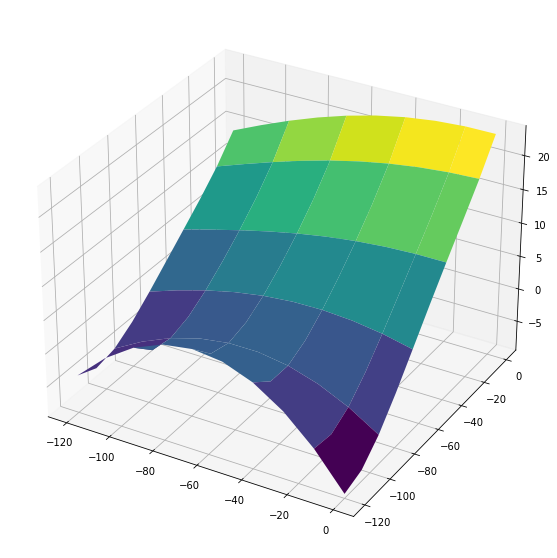

In [118]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

        
def f(Aj,Aa):
    # Aj,Aa = x[0],x[1]
    Bj = -(alpha_j*sigma1 - 2*delta_j*(Aj  + C0))/(2*(4*(np.pi**2)*beta_j + delta_j))
    Ba = -(alpha_a*sigma1 - 2*delta_a*(Aa  + C0))/(2*(4*(np.pi**2)*beta_a + delta_a))
    M1=sigma1*(Aj + C)
    M2=(-sigma2*(Aj + C + Bj/2))
    M3=((-(2*np.pi)**2)*(Bj**2)/2)
    M4=(-((Aj + C0)**2 + (Bj**2)/2))
    M5=(sigma1*(Aa + C))
    M6=(-sigma2*(Aa + C + Ba/2))
    M7=((-(2*np.pi)**2)*(Ba**2)/2)
    M8=(-((Aa + C0)**2 + (Ba**2)/2))
    M=[M1,M2,M3,M4,M5,M6,M7,M8]
    J=0
    for i in range(0,8):
        J+=lam[i]*M[i]
    k=8
    for i in range(0,8):
        for j in range(0,8):
            J+=lam[k]*(M[i]*M[j])
            k+=1
    return J
    
# создаём полотно для рисунка
fig = plt.figure(figsize = (10, 10))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')
# размечаем границы осей для аргументов
xval = np.linspace(-120, 0, 10)
yval = np.linspace(-120, 0, 10)
# создаём массив с xval столбцами и yval строками
# - в этом массиве будут храниться значения z
Aj, Aa = np.meshgrid(xval, yval)
# приравниваем z к функции от x и y 
# z = f(np.vstack([Aj.ravel(), Aa.ravel()])).reshape((10,10))
z = f(Aj,Aa)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
Aj, Aa, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 2,
cstride = 2,
cmap = cm.viridis)